In [4]:
# Install a pip package in the current Jupyter kernel
import sys
from os.path import abspath, basename, join, pardir
import datetime

# hack to handle if running from git cloned folder or stand alone (like Google Colab)
cw = basename(abspath(join(".")))
dp = abspath(join(".",pardir))
if cw=="docs" and basename(dp) == "mmWrt":
    # running from cloned folder
    print("running from git folder, using local path (latest) mmWrt code", dp)
    sys.path.insert(0, dp)
else:
    print("possibly running from Google Colabs, doing required installs")
    !pip install antlr4-python3-runtime==4.11
    !pip install pdflatex
    !sudo apt-get install texlive-latex-recommended
    !sudo apt install texlive-latex-extra
    !sudo apt install dvipng
from sympy.parsing.latex import parse_latex
from IPython.display import Image, display
from sympy import preview
from sympy import init_printing, latex, Symbol
import matplotlib.image as mpimg
from matplotlib import pyplot as plt

f_0 = Symbol(r"f_{0}")
t = Symbol(r"t")
delta = Symbol(r"\delta")
Phi_0 = Symbol(r'\Phi_0')
nu = Symbol(r"\nu")

running from git folder, using local path (latest) mmWrt code c:\git\mmWrt


# FMCW equation

phase of transmitted signal
$$ \mathit{\phi_{TX}(t)} = \Phi + 2 \pi \left(f_{0} t + t^{2} \frac{s}{2}\right) $$

In [5]:

phi_TX_t = parse_latex(r"2 \pi \cdot ( f_0 \cdot t + \frac{s}{2} \cdot t^2 ) + \mathit{Phi}")
print(latex(phi_TX_t))
phi_TX_t = phi_TX_t.subs("Phi",Phi_0)
phi_TX_t

\Phi + 2 \pi \left(f_{0} t + t^{2} \frac{s}{2}\right)


\Phi_0 + (2*pi)*(f_{0}*t + t**2*(s/2))

Transmitted signal is $$ \cos(\phi_{TX}(t)) = \cos(\Phi + 2 \pi \left(f_{0} t + t^{2} \frac{s}{2}\right)) $$

## Received signal

phase of the RX signal is time delayed version of TX:

$$ \phi_{RX}(t) = \phi_{TX}(t-\delta) $$

which can be re-written as:

$$ \phi_{RX}(t) = \Phi_{0} + 2 \pi \left(f_{0} \left(- \delta + t\right) + \frac{s \left(- \delta + t\right)^{2}}{2}\right) $$

Where the physical signals $ Y_{RX}(t) = A_R \cdot \cos{\phi_{RX}(t)} $


In [6]:
phi_RX_t = phi_TX_t.subs("t", t-delta)
print(latex(phi_RX_t))
phi_RX_t

\Phi_{0} + 2 \pi \left(f_{0} \left(- \delta + t\right) + \frac{s \left(- \delta + t\right)^{2}}{2}\right)


\Phi_0 + 2*pi*(f_{0}*(-\delta + t) + s*(-\delta + t)**2/2)

## Mixer and IF

The mixer multiplies RX and TX signals:

$$ Y_{MIX}(t) = Y_{TX}(t) \cdot Y_{RX}(t) $$
replacing $ Y_{TX}(t) $ and $ Y_{RX}(t) $ by their respective equations :
$$ Y_{MIX}(t) = A_R \cdot \cos(\phi_{RX}(t)) \cdot A_T  \cdot \cos(\phi_{TX}(t))$$

In [17]:
Y_R = parse_latex(r"A_R \cdot \cos(\mathit{PhiR})")
Y_T = parse_latex(r"A_T \cdot \cos(\mathit{PhiT})")
Y_L = parse_latex(r"\frac{A_T \cdot A_R}{2} \cdot \cos(\mathit{PhiT}-\mathit{PhiR})")
Y_H = parse_latex(r"\frac{A_T \cdot A_R}{2} \cdot \cos(\mathit{PhiT}+\mathit{PhiR})")
PhiR = Symbol("\Phi_R")
PhiT = Symbol("\Phi_T")
Y_R = Y_R.subs("PhiR",PhiR)
Y_T = Y_T.subs("PhiT",PhiT)
Y_L_symbolic = Y_L.subs("PhiR",PhiR)
Y_L_symbolic = Y_L_symbolic.subs("PhiT",PhiT)
Y_H_symbolic = Y_H.subs("PhiR",PhiR)
Y_H_symbolic = Y_H_symbolic.subs("PhiT",PhiT)
Y_MIX_simbolic = Y_R * Y_T
print("Y_MIX is:")
Y_MIX_simbolic

Y_MIX is:


A_{R}*A_{T}*cos(\Phi_R)*cos(\Phi_T)

In [18]:
Y_L_symbolic+Y_H_symbolic

A_{R}*A_{T}*cos(\Phi_R - \Phi_T)/2 + A_{R}*A_{T}*cos(\Phi_R + \Phi_T)/2

In [19]:
Y_MIX_simbolic.equals(Y_H_symbolic+Y_L_symbolic)

True

## Mixer output

Mixer output is a 2 tone:

* Y_H: high-frequency
* Y_L: low-frequency (aka IF: intermediate frequency)

In [20]:
phi_RX_t + phi_TX_t

2*\Phi_0 + 2*pi*(f_{0}*(-\delta + t) + s*(-\delta + t)**2/2) + (2*pi)*(f_{0}*t + t**2*(s/2))

In [21]:
Y_H_t = Y_H.subs("PhiR",phi_RX_t)
Y_H_t = Y_H_t.subs("PhiT",phi_TX_t)
# phi_2 is the phase of the `high frequency tone`
# here we write it explicitly to simplify the symbolic writting
# we define \mathit{Delta A} for convenience as to also remember it seems
# \mathic can accept spaces
# \mathic does not seem to accept numbers
# \mathic does not seem to accept lower case for first letter ?!?
phi_2_t = parse_latex(r"2 \pi * (2 \cdot f_0 \cdot t - f_0 \cdot \mathit{Delta A} + \frac{s}{2} \cdot \mathit{Delta A}^2 - s * t * \mathit{Delta A}  +s*t^2)  + 2 * \mathit{Phi}")
phi_2_t = phi_2_t.subs("Phi",Phi_0)
phi_2_t = phi_2_t.subs("Delta A",delta)
phi_2_t

2*\Phi_0 + 2*pi*(\delta**2*s/2 - \delta*f_{0} - \delta*s*t + (2*f_{0})*t + s*t**2)

In [22]:
# now we verify the two expressions match
phi1_t = phi_RX_t+phi_TX_t
phi_2_t.equals(phi1_t)

True

In [23]:
Y_H_t

A_{R}*A_{T}*cos(2*\Phi_0 + 2*pi*(f_{0}*(-\delta + t) + s*(-\delta + t)**2/2) + (2*pi)*(f_{0}*t + t**2*(s/2)))/2

## Low frequency component

In [25]:
phi_RX_t - phi_TX_t

2*pi*(f_{0}*(-\delta + t) + s*(-\delta + t)**2/2) - 2*pi*(f_{0}*t + t**2*(s/2))

In [26]:
Y_L_t = Y_H.subs("PhiR",phi_RX_t)
Y_L_t = Y_H_t.subs("PhiT",phi_TX_t)
# phi_l is the phase of the `low frequency tone` aka IF tone
phi_l_t = parse_latex(r"2 \pi * (- f_0 \cdot \mathit{Delta A} + \frac{s}{2} \cdot \mathit{Delta A}^2 - s * t * \mathit{Delta A} )")
phi_l_t = phi_l_t.subs("Phi",Phi_0)
phi_l_t = phi_l_t.subs("Delta A",delta)
phi_l_t

2*pi*(\delta**2*s/2 - \delta*f_{0} - \delta*s*t)

In [27]:
# verify that the two phase definitions match:
phi_l_t.equals(phi_RX_t-phi_TX_t)

True

In [28]:
fb_explicit = parse_latex(r"\mathit{Delta A} \cdot s")
fb_explicit = fb_explicit.subs("Delta A",delta)
fc_implicit = Symbol("f_c")
psi0 = Symbol("\Psi_0")
phi0 = parse_latex(r"\mathit{Delta A} \cdot \mathit{fc}/2 - \mathit{Delta A} \cdot f_0")
phi0 = phi0.subs("Phi zero",Phi_0)
phi0 = phi0.subs("Delta A",delta)
phi0 = phi0.subs("fc",fc_implicit)
print(latex(fc_implicit))
phi_l_new = phi_l_t.subs(fb_explicit,fc_implicit)
phi_l_new

f_{c}


2*pi*(\delta*f_c/2 - \delta*f_{0} - f_c*t)

In [29]:
phi0

\delta*f_c/2 - \delta*f_{0}

In [30]:
phi_l_new = phi_l_new.subs(phi0,psi0)
phi_l_new

2*pi*(\Psi_0 - f_c*t)

In [31]:
Dd = parse_latex(r"\Delta + \delta")
psi1 = phi0.subs(delta, Dd)
psi1

f_c*(Delta + delta)/2 - f_{0}*(Delta + delta)

In [32]:
phi0-psi1

\delta*f_c/2 - \delta*f_{0} - f_c*(Delta + delta)/2 + f_{0}*(Delta + delta)

In [33]:
DPsi = parse_latex(r"f_c \cdot \Delta/2 +f_0 \cdot \Delta")
DPsi

Delta*f_{0} + (Delta*f_{c})/2

here we need to consider that f0 ~60e9 and fc ~1e7 MHz

# BACK-UP section

In [34]:
# deltaz = Symbol("\deltaz")
lows = parse_latex(r"2 \pi \cdot ( f_0 \cdot  \mathit{Delz}  + s * \mathit{Delz} * t - \frac{s}{2} * \mathit{Delz} * \mathit{Delz} )")

lows = lows.subs("Delz", nu)
lows

2*pi*(-\nu**2*s/2 + \nu*f_{0} + \nu*s*t)

In [35]:
lows.equals(low)

NameError: name 'low' is not defined

\delta
2 \pi \left(- \delta^{2} \frac{s}{2} + \left(\delta f_{0} + t \delta s\right)\right)


(2*pi)*(-delta**2*s/2 + (delta*f_{0} + t*(delta*s)))

In [36]:

Y_T = parse_latex(r"A_T \cdot \cos(\mathit{PhiT})")
# Y_T = parse_latex(r"\cos{\Phi_T}")
# Y_T = Y_T.subst(phi_TX, phi_TX_full)
print("Phi T:", latex(P1))
print("phi full:",latex(phi_TX_full))
print("YT:", latex(Y_T))

Y_T1 = Y_T.subs(PhiT,phi_TX_full)
print("YT1", latex(Y_T1))
print("-----")
phi_RX = phi_TX.subs(t, t-delta)
YIF2 = Y_T*Y_R
# phi_if = parse_latex()
YIF_L = parse_latex(r"\frac{A_T \cdot A_T}{2} \cdot \cos(2 \pi \cdot [f_{0} \cdot \delta + s \cdot \delta \cdot t - \frac{s}{2} \cdot \delta^2])")
YIF_H = parse_latex(r"\frac{A_T \cdot A_T}{2} \cdot \cos(2 \pi \cdot [ 2 \cdot f_{0} \cdot t -  f_{0} \cdot \delta + \frac{s}{2} \cdot t^2 + \frac{s}{2} \cdot (t-\delta)^2] + 2 \cdot \Phi_0 )")
YIF3 = YIF_L+YIF_H
# print(YIF2.equals(YIF3))
# print(latex(YIF2-YIF_L))

NameError: name 'P1' is not defined

$$ A_{T}^{2} \cos{\left(Phi_{0} + 2 \pi \left(f_{0} \left(- \delta + t\right) + \frac{s \left(- \delta + t\right)^{2}}{2}\right) \right)} \cos{\left(Phi_{0} + 2 \pi \left(f_{0} t + t^{2} \frac{s}{2}\right) \right)} - \frac{A_{T} A_{T}}{2} \cos{\left(2 \pi \left(- \delta^{2} \frac{s}{2} + \left(\delta f_{0} + t \delta s\right)\right) \right)}
 $$

In [ ]:
expr1 = parse_latex(r"\frac{e+1}{4}")
expr2 = parse_latex(r"\frac{1+e}{4}")
expr1.equals(expr2)

True

$$ \frac{\cos(\alpha + \beta) + \cos(\alpha - \beta)}{2} $$

\cos{\left(\alpha \right)} \cos{\left(\beta \right)}
is same True
\cos{\left(\alpha \right)} \cos{\left(\beta \right)}
is same True
\frac{\cos{\left(\alpha - \beta \right)} + \cos{\left(\alpha + \beta \right)}}{2}
is same True


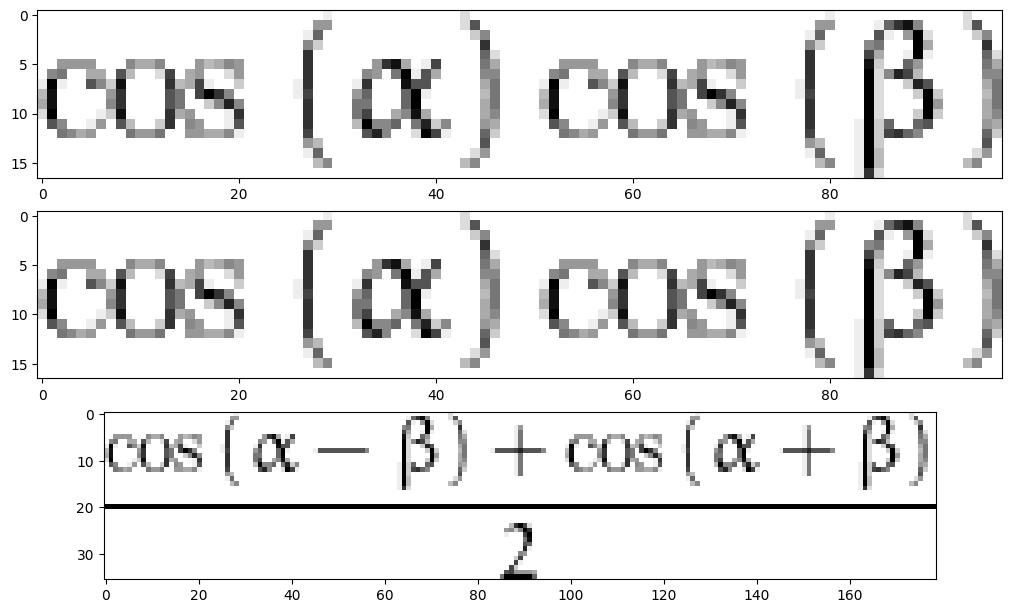

In [ ]:

init_printing()

steps = []
steps= [r"\cos(\alpha) \cdot \cos(\beta)",
        r"\cos(\beta) \cdot \cos(\alpha)",
        r"\frac{\cos(\alpha + \beta) + \cos(\alpha - \beta)}{2}"]

step_old = parse_latex(steps[0])
fns = []
for idx, _ in enumerate(steps):
    step_new = parse_latex(steps[idx])
    #print("step_new", steps[idx])
    print(latex(step_new))
    fn = f'step_{idx}.png'
    preview(step_new,output='png',viewer='file',filename=fn)
    fns.append(mpimg.imread(fn))
    print("is same", step_new.equals(step_old))

plt.figure(figsize=(20,10))
columns = 1
for i, image in enumerate(fns):
    plt.subplot(len(fns) // columns + 1, columns, i + 1)
    plt.imshow(fns[i])


In [ ]:
#from sympy import parse_latex
IFL = parse_latex(r"F_L")
IFH = parse_latex(r"F_H")
IFL_full = parse_latex(r"\cos(x)")
IF = IFL+IFH
print(latex(IF))
yif2 = IF.subs(IFL,IFL_full)
#yif2 = yIF
print(latex(yif2))


F_{H} + F_{L}
F_{H} + \cos{\left(x \right)}


## Examples with Sympy

In [ ]:
P = Symbol(r"P")
phi_TX_full = parse_latex(r"2 \pi \cdot ( f_0 \cdot t + \frac{s}{2} \cdot t^2 ) + P")
Y_T = parse_latex(r"A_T \cdot \cos(P)")
print("Phi T:", latex(P))
print("phi full:",latex(phi_TX_full))

Y_T1 = Y_T.subs(P,phi_TX_full)
print("Y1", latex(Y_T1))
print("works")

Phi T: P
phi full: P + 2 \pi \left(f_{0} t + t^{2} \frac{s}{2}\right)
Y1 A_{T} \cos{\left(P + 2 \pi \left(f_{0} t + t^{2} \frac{s}{2}\right) \right)}
works


In [ ]:
P0 = Symbol(r"Phi")
x = Symbol("x")
phi_TX_full0 = parse_latex(r"2 \pi \cdot ( f_0 \cdot t + \frac{s}{2} \cdot t^2 ) + P")
Y_T = parse_latex(r"A_T \cdot \mathit{Phi}")
print(f"P0: {P0}")
print(f"phi full: {Y_T}")

Y_T0 = Y_T.subs(P0,x)
print("SUBS:", latex(Y_T0))
print("works")

P0: Phi
phi full: A_{T}*Phi
SUBS: A_{T} x
works


In [ ]:
x = Symbol("x")
phi_TX_full0 = parse_latex(r"2 \pi \cdot ( f_0 \cdot t + \frac{s}{2} \cdot t^2 ) + P")
Y_T = parse_latex(r"A_T \cdot \mathit{Phi}")
print(f"P0: {P0}")
print(f"Y_T: {Y_T}")

Y_T0 = Y_T.subs("Phi",x)
print("SUBS:", latex(Y_T0))
print("works")

P0: Phi_{0}
Y_T: A_{T}*Phi
SUBS: A_{T} x
works


In [ ]:
P5 = Symbol(r"\Psi_{5}")
# P5 = Symbol("P5")   # works
Y = parse_latex(r"A_T \cdot \mathit{psi-5}") # does not work
Y = parse_latex(r"A_T \cdot \mathit{psi 5}") # does not work
Y = parse_latex(r"A_T \cdot \mathit{psi5}") # does not work
Y = parse_latex(r"A_T \cdot \mathit{psiv}") # works
# Y = parse_latex(r"A_T \cdot \mathit{psi v}") # works

print("Y",Y)
Y_T1 = Y.subs("psiv",P5)
print("SUBS:", latex(Y_T1))
P5

Y A_{T}*psiv
SUBS: A_{T} \Psi_{5}


\Psi_{5}